In [4]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
from scipy.sparse import csc_matrix, eye, diags
from scipy.sparse.linalg import spsolve
import scipy
import os

In [5]:
path='data/LR/'
files=os.listdir(path)
#files.remove('.ipynb_checkpoints')
len(files)

46

In [6]:
wf=[]
j=0
for i in files:
    #print(j)
    wf.append(Waterfall(path+i))
    j+=1
name=[]
j=0
for i in wf:
    name.append([i.container.f_stop-i.container.f_start,files[j]])
    j+=1
name.sort(reverse=True)
wf=[]
for i in name:
    wf.append(Waterfall(path+i[1]))
# for i in wf:
#     print(np.mean(i.get_power()[1])/np.std(i.get_power()[1]))

In [52]:
j=1
plt.figure(figsize=(10,4*len(wf)),dpi=100)
for i in wf:
    plt.subplot(len(wf),1,j)
    i.plot_spectrum()
    j+=1
plt.savefig('plots/after_mid/LR_gallery.pdf',bbox_inches = 'tight')
plt.close()

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integrati

In [7]:
data=pd.DataFrame()
data['source_name']=[]
data['time(MJD)']=[]
data['src_raj']=[]
data['f_range(MHz)']=[]
data['RFI(MHz)']=[]
data

,source_name,time(MJD),src_raj,f_range(MHz),RFI(MHz)


In [8]:
j=0
for i in wf:
    a=i.header['source_name']
    b=i.header['tstart']
    c=i.header['src_raj']
    d=(i.container.f_begin,i.container.f_end)
    e=rfi.rfi_range(i)
    data.loc[j]=[a,b,c,d,e]
    j+=1
    #print(j)

In [9]:
data

,source_name,time(MJD),src_raj,f_range(MHz),RFI(MHz)
0,Unknown,58897.549630,4h08m29.73s,"(1257.3544921875, 2701.8544921875)","[[1257.3544921875, 1274.3205657072579], [1310...."
1,J0918-1205,59046.609155,8h26m01.91s,"(856.0, 1712.0)","[[935.396776349414, 946.8554553871836], [1170...."
2,J0918-1205_offset,59046.595440,8h26m01.91s,"(856.0, 1712.0)","[[935.2805380317171, 946.8803945115646], [1170..."
3,Unknown,58947.744456,8h36m01.6s,"(856.0, 1712.0)","[[934.6674218368289, 959.2387113413307], [1175..."
4,Unknown,58947.739363,4h08m27.24s,"(856.0, 1712.0)","[[934.73480098464, 947.0347975839283], [1173.6..."
5,Unknown,58947.739016,4h08m27.24s,"(856.0, 1712.0)","[[934.8119417086796, 946.8228465034707], [1171..."
6,Unknown,58947.726481,4h08m27.24s,"(856.0, 1712.0)","[[934.6750488518279, 946.8061232821938], [1171..."
7,Unknown,58947.725671,4h08m27.24s,"(856.0, 1712.0)","[[934.7782062508089, 946.9578934550798], [1170..."
8,Unknown,58947.721493,8h36m01.6s,"(856.0, 1712.0)","[[934.8220714662466, 946.659928836894], [1175...."
9,Unknown,58947.716609,8h36m01.6s,"(856.0, 1712.0)","[[934.6812075152774, 958.9190631109473], [1173..."


In [10]:
data.to_latex('Known_RFI.tex',index=False)
data.to_csv('Known_RFI.csv',index=False)

In [11]:
a=0
b=0
c=0
for i in data['RFI(MHz)']:
    for j in i:
        if ((j[0]>880)&(j[0]<970)) or ((j[1]>880)&(j[1]<970)):
            a+=1
            break
for i in data['RFI(MHz)']:
    for j in i:
        if ((j[0]>1120)&(j[0]<1300)) or ((j[1]>1120)&(j[1]<1300)):
            b+=1
            break
for i in data['RFI(MHz)']:
    for j in i:
        if ((j[0]>1400)&(j[0]<1610)) or ((j[1]>1400)&(j[1]<1610)):
            c+=1
            break
print(a,b,c)

43 34 30


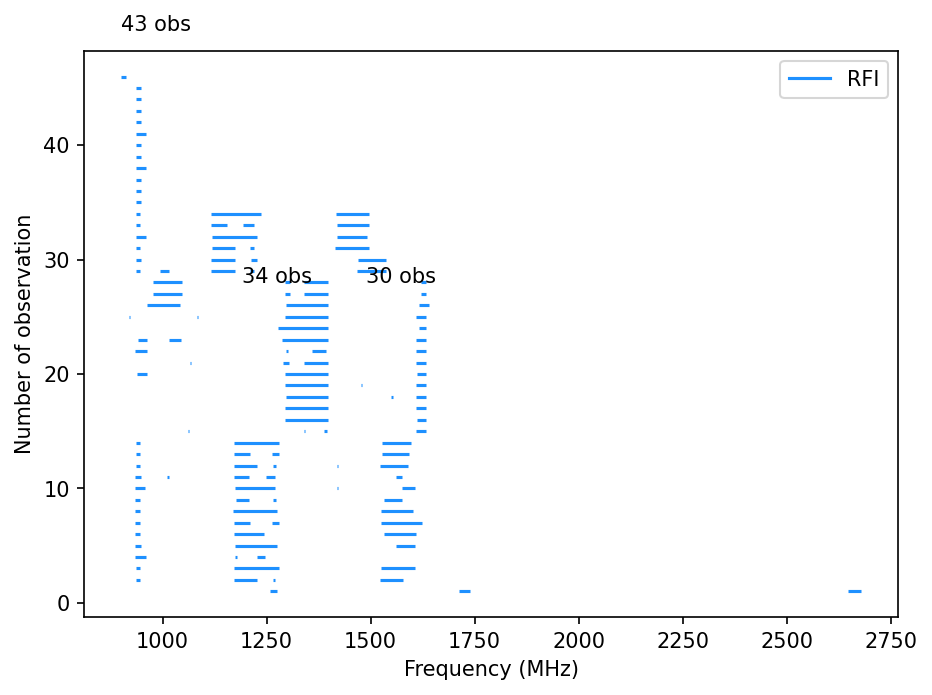

In [13]:
j=1
plt.figure(figsize=(7,5),dpi=150)
for i in data['RFI(MHz)']:
    for k in i:
        plt.hlines(j,k[0],k[1],color='dodgerblue')
    j+=1
plt.plot([],[],color='dodgerblue',label='RFI')
# plt.vlines(880,0,50,'dodgerblue',linestyles='--')
# plt.vlines(960,0,50,'dodgerblue',linestyles='--')
# plt.vlines(1120,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1300,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1400,0,28,'dodgerblue',linestyles='--')
# plt.vlines(1610,0,28,'dodgerblue',linestyles='--')
# plt.bar(700,50,width=312,color='w',hatch='/',label='UHF-band')
# plt.bar(972,50,width=232,color='w',hatch='X',label='UHF and L overlap')
# plt.bar(1400,50,width=624,color='w',hatch="\\",label='L-band')
plt.text(900,50,str(a)+' obs')
plt.text(1190,28,str(b)+' obs')
plt.text(1490,28,str(c)+' obs')
plt.ylabel('Number of observation')
plt.xlabel('Frequency (MHz)')
plt.legend()
plt.savefig('RFI_vs_File.pdf')

In [17]:
print('L-Band RFI range (approximately):',(880,960),(1120,1300),(1400,1610))
print('The percentage is '+str(np.round(460/856*100,decimals=2))+'%')
print('UHF-Band RFI range (approximately):',(880,970))
print('The percentage is '+str(np.round(90/544*100,decimals=2))+'%')

L-Band RFI range (approximately): (880, 960) (1120, 1300) (1400, 1610)
The percentage is 53.74%
UHF-Band RFI range (approximately): (880, 970)
The percentage is 16.54%


In [159]:
SNR=[]
for i in wf:
    SNR.append([i.container.f_stop-i.container.f_start,i])
#SNR.sort()
#SNR

In [114]:
j=1
plt.figure(figsize=(9,9),dpi=150)
for i in SNR[:9]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    plt.subplot(9,1,j)
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.text(584,np.amax(p)*0.9,files[j-1])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=9:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('1.pdf')
plt.close()

In [115]:
j=1
plt.figure(figsize=(9,9),dpi=150)
for i in SNR[9:18]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.subplot(9,1,j)
    plt.text(584,np.amax(p)*0.9,files[j+8])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=9:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('2.pdf')
plt.close()

In [116]:
j=1
plt.figure(figsize=(9,9),dpi=150)
for i in SNR[18:27]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.subplot(9,1,j)
    plt.text(584,np.amax(p)*0.9,files[j+17])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=9:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('3.pdf')
plt.close()

In [117]:
j=1
plt.figure(figsize=(9,9),dpi=150)
for i in SNR[27:35]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.subplot(9,1,j)
    plt.text(584,np.amax(p)*0.9,files[j+26])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=9:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('4.pdf')
plt.close()

In [118]:
j=1
plt.figure(figsize=(9,9),dpi=150)
for i in SNR[36:45]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.subplot(9,1,j)
    plt.text(584,np.amax(p)*0.9,files[j+35])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=9:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('5.pdf')
plt.close()

WARING max iteration reached!
WARING max iteration reached!


In [119]:
j=1
plt.figure(figsize=(9,5),dpi=150)
for i in SNR[45:]:
    if i[1].container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i[1].get_power()[0][1:]
        p=i[1].get_power()[1][1:]
    else:
        f=i[1].get_power()[0]
        p=i[1].get_power()[1]
    #Different situation:
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
    #print(np.amax(p))
    plt.subplot(5,1,j)
    plt.text(584,np.amax(p)*0.9,files[j+44])
    plt.plot(f,p,'black',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i[1])
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),width=(k[1]-k[0]),bottom=np.amin(base))
    plt.xlim(544,1712)
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=5:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    j+=1
plt.savefig('6.pdf')
plt.close()

In [16]:
j=1
plt.figure(figsize=(10,4*len(wf)),dpi=100)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    #Different situation:
    plt.subplot(49,1,j)
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
        plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
        plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
        plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
        plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
        plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    #print(np.amax(p))
    plt.plot(f,p,'k',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i,dist=40)
    tot=0
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),color='lime',width=(k[1]-k[0]),bottom=np.amin(base))
        tot+=(k[1]-k[0])
    plt.text(1128,np.amax(p)*0.9,
             str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
             ,size=5,ha='center')
    plt.xlim(544,1712)
    #plt.ylim(ymax=np.amax(p)*0.5)
    #plt.yscale('log')
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
#     if j!=49:
#         plt.xticks([])
#     plt.subplots_adjust(hspace=0)
    #print(j)
    j+=1
plt.savefig('plots/after_mid/all_fitting_LR.pdf',bbox_inches = 'tight')
plt.close()

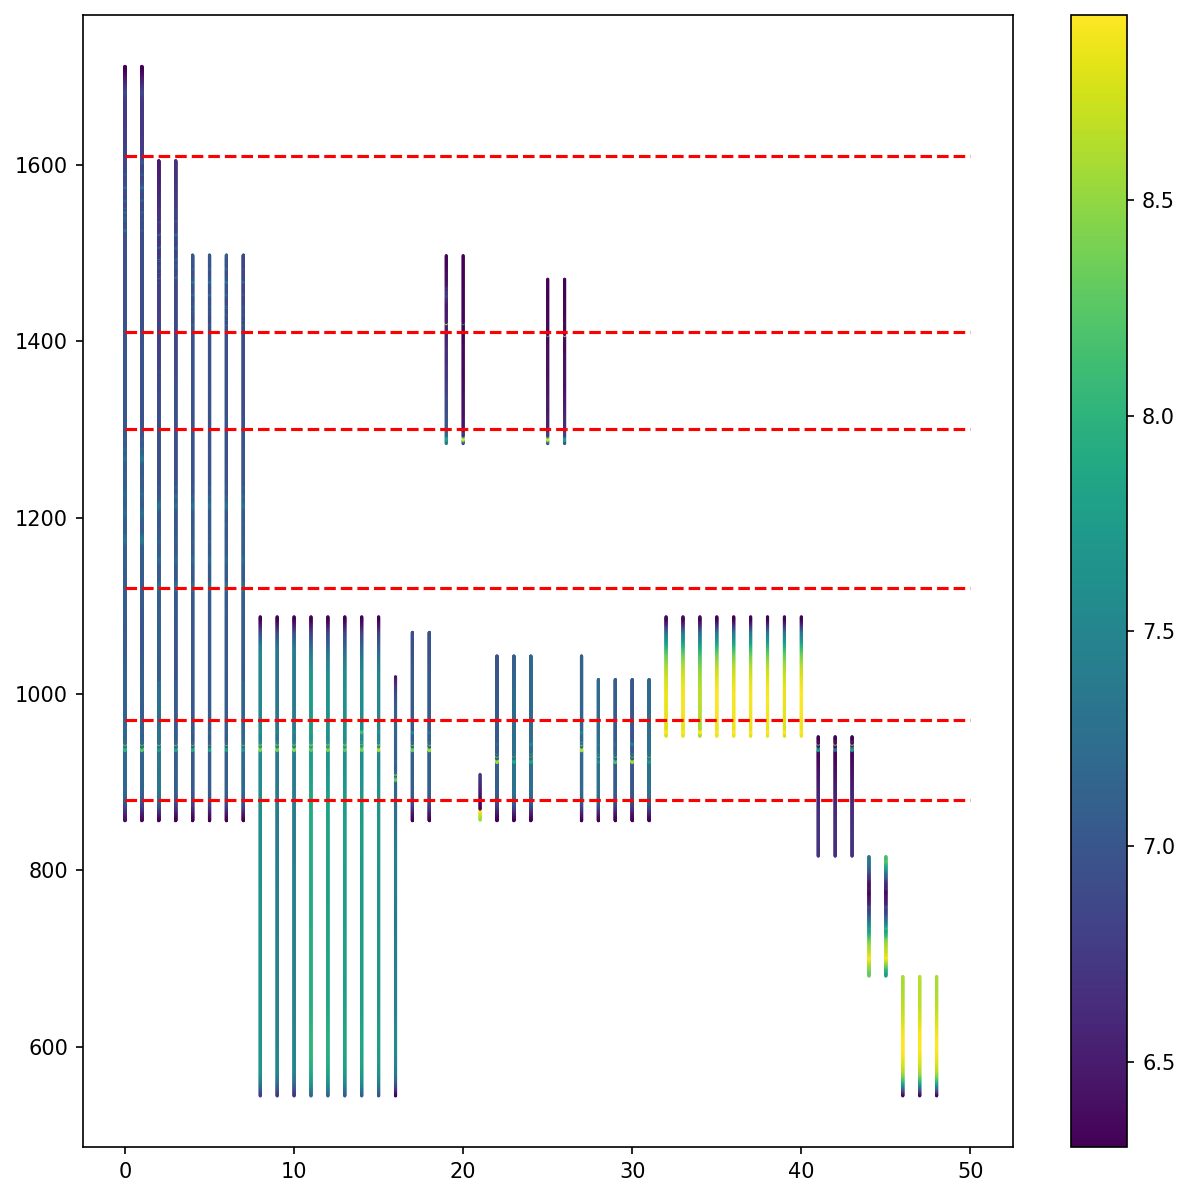

In [46]:
j=0
plt.figure(figsize=(10,10),dpi=150)
for i in wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    x=np.zeros(f.size)
    x=np.where(x!=j,j,x)
    norm=np.linalg.norm(np.array([f,p]))
    #p=p/norm
    #print(p[0])
    plt.scatter(x,f,c=np.log(p),s=0.25)
    #plt.vlines(j,np.amin(f),np.amax(f),c)
    j+=1
plt.hlines(880,0,50,'r',linestyles='--')
plt.hlines(970,0,50,'r',linestyles='--')
plt.hlines(1120,0,50,'r',linestyles='--')
plt.hlines(1300,0,50,'r',linestyles='--')
plt.hlines(1410,0,50,'r',linestyles='--')
plt.hlines(1610,0,50,'r',linestyles='--')
plt.colorbar()
plt.savefig('not_imshow.pdf')

In [26]:
pres=[0,9,20,22,32,45,46]
pres_wf=[]
for i in pres:
    pres_wf.append(wf[i])

In [12]:
j=1
plt.figure(figsize=(10,70),dpi=100)
for i in pres_wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    #Different situation:
    plt.subplot(49,1,j)
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    #print(np.amax(p))
    plt.plot(f,p,'k',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i)
    tot=0
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),color='lime',width=(k[1]-k[0]),bottom=np.amin(base))
        tot+=(k[1]-k[0])
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.xlim(544,1712)
    #plt.ylim(np.amin(base),np.amin(base)+(np.amax(p)-np.min(base))/2)
    #plt.yscale('log')
    plt.legend()
    #plt.ylim(np.amin(base),np.amax(p))
    if j!=7:
        plt.xticks([])
    plt.subplots_adjust(hspace=0)
    #print(j)
    j+=1
plt.savefig('all_fitting_pres.pdf',bbox_inches = 'tight')
plt.close()

NameError: name 'pres_wf' is not defined

<Figure size 1000x7000 with 0 Axes>

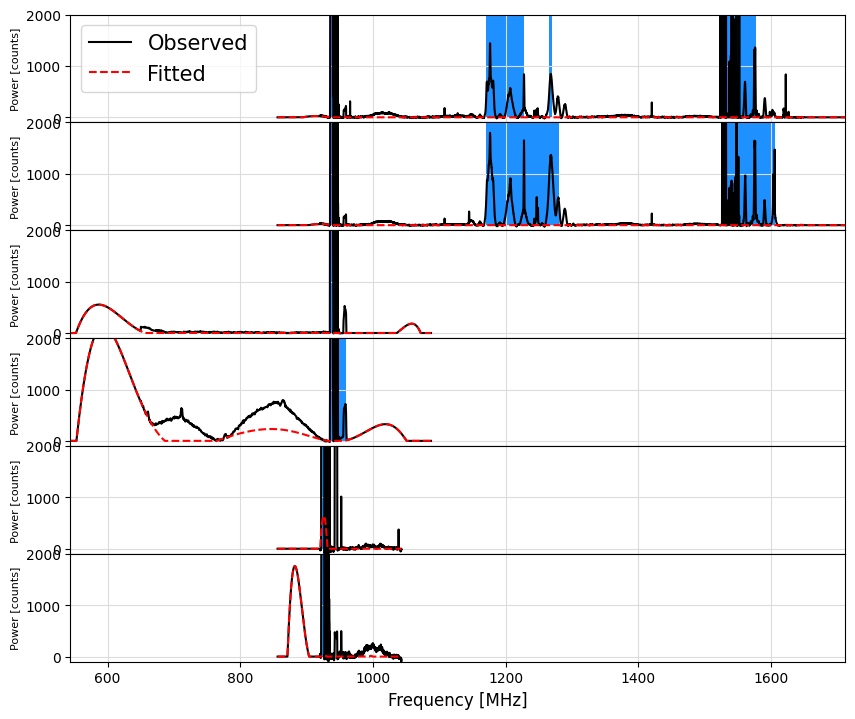

In [27]:
pres=[0,1,10,11,22,23]
pres_wf=[]
for i in pres:
    pres_wf.append(wf[i])
j=1
plt.figure(figsize=(10,70),dpi=100)
for i in pres_wf:
    if i.container.f_start==(856.0 or 544.0): #remove the first index for a better fitting
        f=i.get_power()[0][1:]
        p=i.get_power()[1][1:]
    else:
        f=i.get_power()[0]
        p=i.get_power()[1]
    #Different situation:
    plt.subplot(49,1,j)
    snr=p.mean()/p.std()
    if snr>15:
        base=rfi.splbase(f,p)
        rm=p-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>6:
        r,base=rfi.peakbase(f,p)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    elif snr>3:
        base=rfi.splbase(f,p)
        rm=p-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with spline fitting',size=5,ha='center')
    elif snr>1.6:
        r,base=rfi.peakbase(f,p,deg=6)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
    else:
        r,base=rfi.peakbase(f,p,deg=10)
        p=r
        rm=r-base
#         plt.text(1128,np.amax(p)*0.99,name[j-1][1]+' with peakutils',size=5,ha='center')
#     if i.container.f_start==856.0:
#         index=np.where(f<920)[0][-1]
#         p=np.concatenate((base[:index],p[index:]))
#     if i.container.f_end==1712.0:
#         index=np.where(f>1650)[0][0]
#         p=np.concatenate((p[:index],base[index:]))
#     if i.container.f_start==544.0:
#         index=np.where(f<650)[0][-1]
#         p=np.concatenate((base[:index],p[index:]))
#     if np.round(i.container.f_end,decimals=1)==1088.0:
#         index=np.where(f>960)[0][0]
#         p=np.concatenate((p[:index],base[index:]))
    index_1=np.where((f>=544.0)&(f<=650.0))
    index_2=np.where((f>=856.0)&(f<=920.0))
    index_3=np.where((f>=960.0)&(f<=1088.0))
    index_4=np.where((f>=1650.0)&(f<=1712.0))
    p[index_1]=base[index_1]
    if i.container.f_start==856.0:
        p[index_2]=base[index_2]
    if np.round(i.container.f_stop,decimals=1)==1088.0:
        p[index_3]=base[index_3]
    p[index_4]=base[index_4]
    #print(np.amax(p))
    plt.plot(f,p,'k',label='Observed')
    plt.plot(f,base,'r--',label='Fitted')
    RFI=rfi.rfi_range(i)
    tot=0
    for k in RFI:
        plt.bar((k[1]+k[0])/2,height=np.amax(p)-np.amin(base),color='dodgerblue',width=(k[1]-k[0]),bottom=np.amin(base))
        tot+=(k[1]-k[0])
#     plt.text(1128,np.amax(p)*0.9,
#              str(j)+'Identified RFI covers '+str(np.round(tot/(i.container.f_stop-i.container.f_start)*100,decimals=2))+'% of given bandwidth'
#              ,size=5,ha='center')
    plt.xlim(544,1712)
    if j==1 or j==2 or j==3 or j==4:
#         plt.ylim(-100,np.amax(p)/16)
        plt.ylim(-100,2000)
    else:
#         plt.ylim(-100,np.amax(p)/48)
        plt.ylim(-100,2000)
    plt.ylabel('Power [counts]',fontsize=8)
    #plt.yscale('log')
    if j==1:
        plt.legend(fontsize=15)
    #plt.ylim(np.amin(base),np.amax(p))
    if j==6:
        plt.xlabel('Frequency [MHz]',fontsize=12)
    if j!=6:
        plt.xticks(visible=False)
    plt.grid(b=True, which='major', color='gainsboro')
    plt.subplots_adjust(hspace=0)
    #print(j)
    j+=1
plt.savefig('all_fitting_pres.pdf',bbox_inches = 'tight')
#plt.close()

In [117]:
print(wf[22].get_power()[1][3800:])

[585.4825  584.5436  582.66693 584.2307  585.836   585.8594  585.8502
 583.63745 585.9669  581.786   581.3783  582.6489  578.2608  579.98364
 584.6342  581.1704  581.5193  576.1358  580.8224  580.614   577.00684
 579.8956  580.77466 579.5567  575.91125 580.4318  574.07465 577.71246
 578.56335 576.7614  574.53284 576.8695  580.27026 573.5906  575.40375
 577.62714 575.61237 580.5493  574.5439  573.20435 572.7817  573.28107
 575.41095 580.4314  576.58923 574.07825 569.7284  572.4144  570.09314
 570.4629  573.5651  572.2772  568.40607 572.6816  572.0381  569.62054
 572.15247 572.9721  564.9478  568.3421  568.52124 571.1374  566.99493
 566.8132  570.0739  569.4471  567.80206 568.342   569.94025 566.03015
 571.7316  566.9032  569.6978  568.1768  565.8956  566.0362  569.4206
 565.80646 564.5394  567.3748  568.6865  566.5396  564.2872  562.9607
 563.3818  564.42993 566.52423 571.75543 565.9088  564.3398  562.657
 564.66113 563.8246  567.0307  564.0152  563.0621  567.5781  564.86523
 569.348   

In [139]:
index=np.where((wf[10].get_power()[0]>=544.0)&(wf[14].get_power()[0]<=650.0))[0]

In [146]:
wf[22].info()


--- File Info ---
      machine_id :                               20
    telescope_id :                               -1
       data_type :                                1
            fch1 :                        856.0 MHz
            foff :                  0.208984375 MHz
          nchans :                              896
     source_name :                       J0918-1205
         src_raj :                       8:26:01.91
         src_dej :                      -47:14:54.5
        az_start :                              0.0
        za_start :                              0.0
           nbits :                               32
   tstart (ISOT) :          2020-07-16T15:56:49.000
    tstart (MJD) :               59046.664456018516
           tsamp :              0.00979977570093458
            nifs :                                1

Num ints in file :                              548
      File shape :                    (548, 1, 896)
--- Selection Info ---
Data selection shape 